In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Loading data set

In [2]:
df = pd.read_csv('audi.csv')
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


In [3]:
print(df.shape)
print(df.info())
print(df.columns)

(10668, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


#### One-hot Encoding

In [4]:
df = pd.get_dummies(df, drop_first=True)
display(df.head(10))
df.info()
df.shape

,year,price,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,64.2,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,67.3,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,2016,13900,32260,58.9,1.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2016,13250,76788,61.4,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2016,11750,75185,70.6,2.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,2015,10200,46112,60.1,1.4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,2016,12000,22451,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10668 non-null  int64  
 1   price                   10668 non-null  int64  
 2   mileage                 10668 non-null  int64  
 3   mpg                     10668 non-null  float64
 4   engineSize              10668 non-null  float64
 5   model_ A2               10668 non-null  uint8  
 6   model_ A3               10668 non-null  uint8  
 7   model_ A4               10668 non-null  uint8  
 8   model_ A5               10668 non-null  uint8  
 9   model_ A6               10668 non-null  uint8  
 10  model_ A7               10668 non-null  uint8  
 11  model_ A8               10668 non-null  uint8  
 12  model_ Q2               10668 non-null  uint8  
 13  model_ Q3               10668 non-null  uint8  
 14  model_ Q5               10668 non-null

(10668, 34)

- One-hot Encoding has been chosen because categorical features are not ordinal and there are only 3 categorical features.

#### Separating the features and target variable

In [5]:
target = ['price']
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(10668, 33) (10668, 1)


#### Create train and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


#### Training with Linear Regression

In [7]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Linear Regression Coefficients and intercept

In [8]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
29,transmission_Manual,-1.205987e+03
32,fuelType_Petrol,-4.139250e+02
2,mpg,-1.692461e+02
1,mileage,-7.609565e-02
21,model_ RS7,1.111403e-09
30,transmission_Semi-Auto,1.048772e+02
11,model_ Q2,7.336904e+02
5,model_ A3,1.289843e+03
24,model_ S5,1.295996e+03
6,model_ A4,1.594688e+03


- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

In [9]:
model.intercept_

array([-4060707.74307608])

#### Prediction

In [10]:
y_pred = model.predict(X_test)

#### Prediction Error

In [13]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error
# MAPE = mean_absolute_percentage_error(y_test, y_pred)
# print("mean absolute percentage error = ", MAPE, "%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2720.087568599515
mean squared error =  17229727.46218719
root mean squared error =  4150.87068723987
coefficient of determination =  0.8859936175487338


<font color=red>mean_absolute_percentage_error function is not loading in my machine, hence its not working</font>

#### Comparison of prediction error through visualization

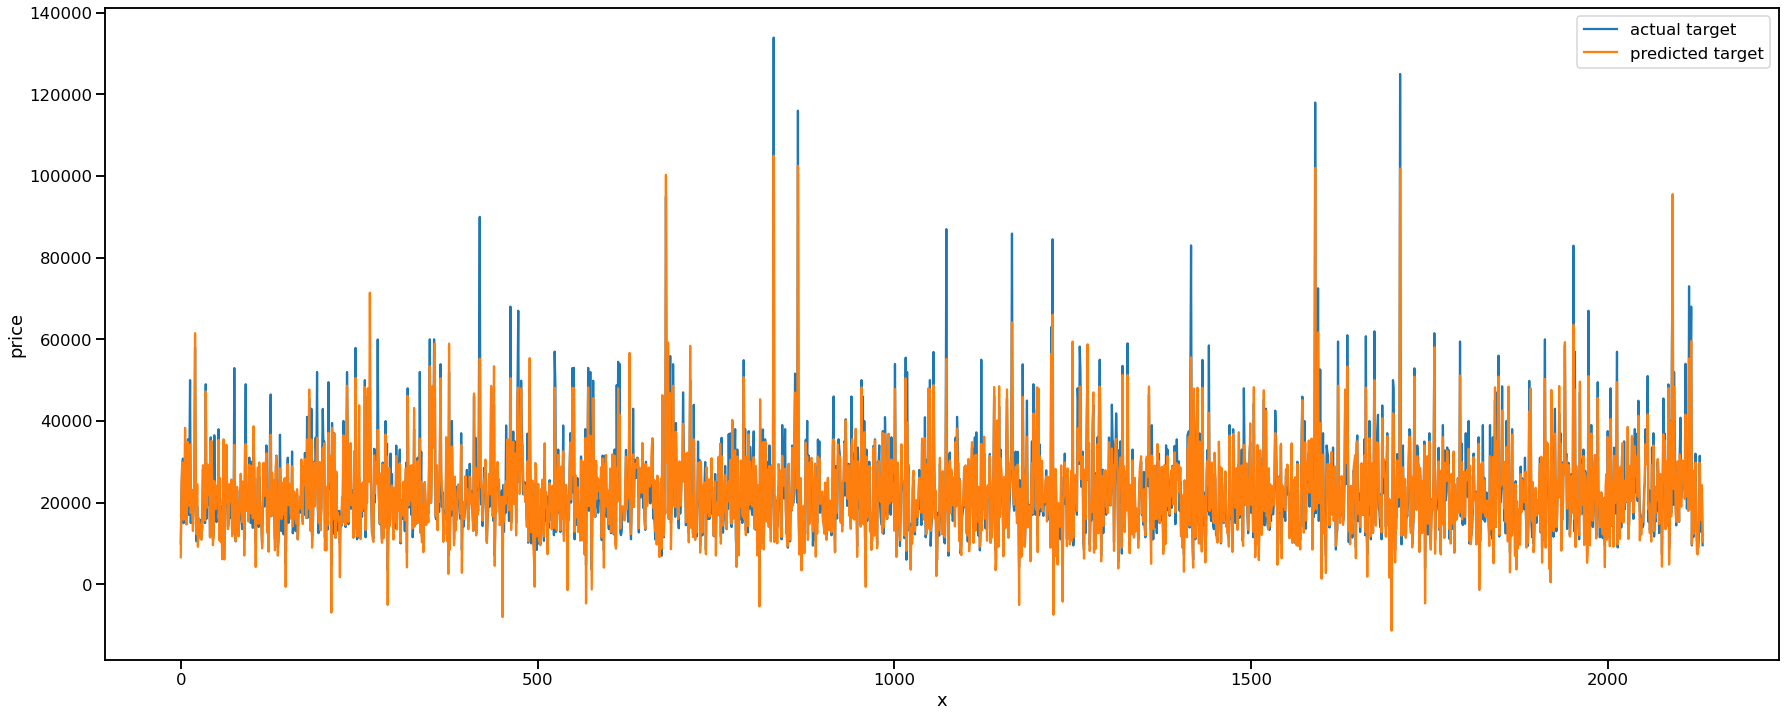

In [14]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

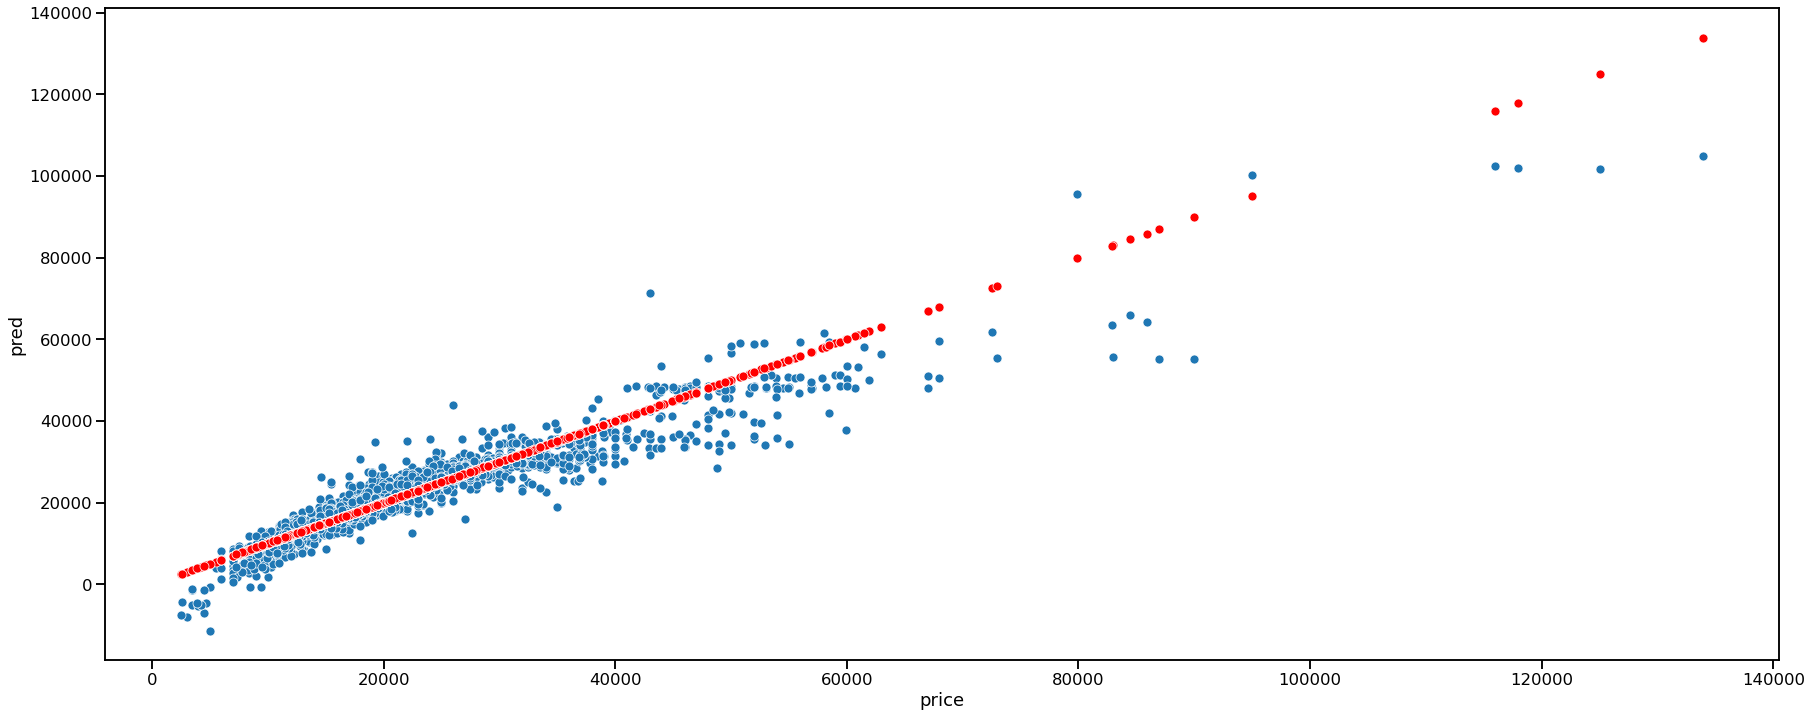

In [15]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()